In [1]:
from astropy.io import fits
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
SAGE_z0_load = fits.open('tao.1950.0.fits')
SAGE_z1_load = fits.open('tao.1958.0.fits')
SAGE_z2_load = fits.open('tao.1960.0.fits')
SAGE_z3_load = fits.open('tao.1956.0.fits')

In [2]:
data_z0Sage = SAGE_z0_load[1].data
data_z1Sage = SAGE_z1_load[1].data
data_z2Sage = SAGE_z2_load[1].data
data_z3Sage = SAGE_z3_load[1].data

In [3]:
idx_cen_z0Sage = np.where(data_z0Sage[:]['Galaxy_Classification'] == 0) [0]
idx_sat_z0Sage  = np.where(data_z0Sage[:]['Galaxy_Classification'] == 1) [0]
gal_cen_z0Sage = data_z0Sage[idx_cen_z0Sage]
gal_sat_z0Sage = data_z0Sage[idx_sat_z0Sage]
idx_cen_z1Sage = np.where(data_z1Sage[:]['Galaxy_Classification'] == 0) [0]
idx_sat_z1Sage  = np.where(data_z1Sage[:]['Galaxy_Classification'] == 1) [0]
gal_cen_z1Sage = data_z1Sage[idx_cen_z1Sage]
gal_sat_z1Sage = data_z1Sage[idx_sat_z1Sage]

idx_cen_z2Sage = np.where(data_z2Sage[:]['Galaxy_Classification'] == 0) [0]
idx_sat_z2Sage  = np.where(data_z2Sage[:]['Galaxy_Classification'] == 1) [0]
gal_cen_z2Sage = data_z2Sage[idx_cen_z2Sage]
gal_sat_z2Sage = data_z2Sage[idx_sat_z2Sage]

idx_cen_z3Sage = np.where(data_z3Sage[:]['Galaxy_Classification'] == 0) [0]
idx_sat_z3Sage  = np.where(data_z3Sage[:]['Galaxy_Classification'] == 1) [0]
gal_cen_z3Sage = data_z3Sage[idx_cen_z3Sage]
gal_sat_z3Sage = data_z3Sage[idx_sat_z3Sage]

#### Taking all galaxies with TSM = 0 out of sample
TSM_idx_cen_z0Sage = np.where(gal_cen_z0Sage[:]['Total_Stellar_Mass']!=0)[0]
gal_cen_z0Sage = gal_cen_z0Sage[TSM_idx_cen_z0Sage]

TSM_idx_cen_z1Sage = np.where(gal_cen_z1Sage[:]['Total_Stellar_Mass']!=0)[0]
gal_cen_z1Sage = gal_cen_z1Sage[TSM_idx_cen_z1Sage]

TSM_idx_cen_z2Sage = np.where(gal_cen_z2Sage[:]['Total_Stellar_Mass']!=0)[0]
gal_cen_z2Sage = gal_cen_z2Sage[TSM_idx_cen_z2Sage]

TSM_idx_cen_z3Sage = np.where(gal_cen_z3Sage[:]['Total_Stellar_Mass']!=0)[0]
gal_cen_z3Sage = gal_cen_z3Sage[TSM_idx_cen_z3Sage]

In [86]:
allgal_cen_Sage = [gal_cen_z0Sage, gal_cen_z1Sage, gal_cen_z2Sage, gal_cen_z3Sage]
gal_cen_Sage = {}
i=0

for i in range(len(allgal_cen_Sage)):
    gal_cen_Sage["gal_idx_z{0}_SM7_8".format(i)] = np.where(np.logical_and(1e10*allgal_cen_Sage[i]['Total_Stellar_Mass'] >= 1e7, 
                                                                                     1e10*allgal_cen_Sage[i]['Total_Stellar_Mass'] <= 1e8))[0]
    
    gal_cen_Sage["gal_idx_z{0}_SM8_9".format(i)] = np.where(np.logical_and(1e10*allgal_cen_Sage[i]['Total_Stellar_Mass'] > 1e8, 
                                                                                     1e10*allgal_cen_Sage[i]['Total_Stellar_Mass'] <= 1e9))[0]
    
    gal_cen_Sage["gal_idx_z{0}_SM9_10".format(i)] = np.where(np.logical_and(1e10*allgal_cen_Sage[i]['Total_Stellar_Mass'] > 1e9, 
                                                                                     1e10*allgal_cen_Sage[i]['Total_Stellar_Mass'] <= 1e10))[0]
    
    gal_cen_Sage["gal_idx_z{0}_SM10_11".format(i)] = np.where(np.logical_and(1e10*allgal_cen_Sage[i]['Total_Stellar_Mass'] > 1e10, 
                                                                                     1e10*allgal_cen_Sage[i]['Total_Stellar_Mass'] <= 1e11))[0] 
   
    gal_cen_Sage["gal_idx_z{0}_SM11_12".format(i)] = np.where(np.logical_and(1e10*allgal_cen_Sage[i]['Total_Stellar_Mass'] > 1e11, 
                                                                                     1e10*allgal_cen_Sage[i]['Total_Stellar_Mass'] <= 1e12))[0]
    

    gal_cen_Sage["gal_z{0}_SM7_8".format(i)] = allgal_cen_Sage[i][gal_cen_Sage["gal_idx_z{0}_SM7_8".format(i)]]
    gal_cen_Sage["gal_z{0}_SM8_9".format(i)] = allgal_cen_Sage[i][gal_cen_Sage["gal_idx_z{0}_SM8_9".format(i)]]
    gal_cen_Sage["gal_z{0}_SM9_10".format(i)] = allgal_cen_Sage[i][gal_cen_Sage["gal_idx_z{0}_SM9_10".format(i)]]
    gal_cen_Sage["gal_z{0}_SM10_11".format(i)] = allgal_cen_Sage[i][gal_cen_Sage["gal_idx_z{0}_SM10_11".format(i)]] 
    gal_cen_Sage["gal_z{0}_SM11_12".format(i)] = allgal_cen_Sage[i][gal_cen_Sage["gal_idx_z{0}_SM11_12".format(i)]]


In [151]:
                
i=0
j=0
for i in range(len(allgal_cen_Sage)):
    for j in range(5):
        j = j + 7
        gal_cen_Sage["morph_z{0}_SM{1}_{2}".format(i,j,j+1)] = (gal_cen_Sage['gal_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Total_Stellar_Mass'] - gal_cen_Sage['gal_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Bulge_Stellar_Mass'])/gal_cen_Sage['gal_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Total_Stellar_Mass']          
        gal_cen_Sage["xspin_z{0}_SM{1}_{2}".format(i,j,j+1)] = gal_cen_Sage['gal_z{0}_SM{1}_{2}'.format(i,j,j+1)]['X_Spin']
        gal_cen_Sage["yspin_z{0}_SM{1}_{2}".format(i,j,j+1)] = gal_cen_Sage['gal_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Y_Spin']
        gal_cen_Sage["zspin_z{0}_SM{1}_{2}".format(i,j,j+1)] = gal_cen_Sage['gal_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Z_Spin']      

        gal_cen_Sage["spin_z{0}_SM{1}_{2}".format(i,j,j+1)] = np.sqrt(gal_cen_Sage['xspin_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    gal_cen_Sage['yspin_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    gal_cen_Sage['zspin_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2) 
    


        gal_cen_Sage["gal_hlambda_z{0}_SM{1}_{2}".format(i,j,j+1)] = gal_cen_Sage['spin_z{0}_SM{1}_{2}'.format(i,j,j+1)]/(np.sqrt(2)*
                                                                                                                             gal_cen_Sage["gal_z{0}_SM{1}_{2}".format(i,j,j+1)]['Vvir']*
                                                                                                                             gal_cen_Sage["gal_z{0}_SM{1}_{2}".format(i,j,j+1)]['Rvir'])


In [152]:
Disk_Stellar_Mass = gal_cen_z0Sage['Total_Stellar_Mass'] - gal_cen_z0Sage['Bulge_Stellar_Mass']
#w = Disk_Stellar_Mass + gal_cen_z0Sage['Bulge_Stellar_Mass']
#plt.plot(gal_cen_z0Sage['Total_Stellar_Mass'], w, '.')
#plt.show()

In [154]:
############# SAGE ###############
morph_cen_z0Sage = (gal_cen_z0Sage['Total_Stellar_Mass'] - gal_cen_z0Sage['Bulge_Stellar_Mass'])/gal_cen_z0Sage['Total_Stellar_Mass']
morph_cen_z1Sage = (gal_cen_z1Sage['Total_Stellar_Mass'] - gal_cen_z1Sage['Bulge_Stellar_Mass'])/gal_cen_z1Sage['Total_Stellar_Mass']
morph_cen_z2Sage = (gal_cen_z2Sage['Total_Stellar_Mass'] - gal_cen_z2Sage['Bulge_Stellar_Mass'])/gal_cen_z2Sage['Total_Stellar_Mass']
morph_cen_z3Sage = (gal_cen_z3Sage['Total_Stellar_Mass'] - gal_cen_z3Sage['Bulge_Stellar_Mass'])/gal_cen_z3Sage['Total_Stellar_Mass']

###### Redshift 0
bulgedom_idx_cen_z0Sage = np.where(morph_cen_z0Sage > 0.5)[0]
bulgedom_cen_z0Sage = gal_cen_z0Sage[bulgedom_idx_cen_z0Sage]

diskdom_idx_cen_z0Sage = np.where(morph_cen_z0Sage < 0.5)[0]
diskdom_cen_z0Sage = gal_cen_z0Sage[diskdom_idx_cen_z0Sage]

###### Redshift 1
bulgedom_idx_cen_z1Sage = np.where(morph_cen_z1Sage > 0.5)[0]
bulgedom_cen_z1Sage = gal_cen_z1Sage[bulgedom_idx_cen_z1Sage]

diskdom_idx_cen_z1Sage = np.where(morph_cen_z1Sage < 0.5)[0]
diskdom_cen_z1Sage = gal_cen_z1Sage[diskdom_idx_cen_z1Sage]

###### Redshift 2
bulgedom_idx_cen_z2Sage = np.where(morph_cen_z2Sage > 0.5)[0]
bulgedom_cen_z2Sage = gal_cen_z2Sage[bulgedom_idx_cen_z2Sage]

diskdom_idx_cen_z2Sage = np.where(morph_cen_z2Sage < 0.5)[0]
diskdom_cen_z2Sage = gal_cen_z2Sage[diskdom_idx_cen_z2Sage]

###### Redshift 3
bulgedom_idx_cen_z3Sage = np.where(morph_cen_z3Sage > 0.5)[0]
bulgedom_cen_z3Sage = gal_cen_z3Sage[bulgedom_idx_cen_z3Sage]

diskdom_idx_cen_z3Sage = np.where(morph_cen_z3Sage < 0.5)[0]
diskdom_cen_z3Sage = gal_cen_z3Sage[diskdom_idx_cen_z3Sage]

In [155]:
bulgedom_cen_Sage = {}
bulge_gal_cen_Sage = [bulgedom_cen_z0Sage, bulgedom_cen_z1Sage, bulgedom_cen_z2Sage, bulgedom_cen_z3Sage]
for i in range(len(bulge_gal_cen_Sage)):
    bulgedom_cen_Sage["Mvir_z{0}".format(i)] = 1e10*bulge_gal_cen_Sage[i]['Mvir']
    bulgedom_cen_Sage["TSM_z{0}".format(i)] = 1e10*bulge_gal_cen_Sage[i]['Total_Stellar_Mass']    
    bulgedom_cen_Sage["CGMvir_z{0}".format(i)] = 1e10*bulge_gal_cen_Sage[i]['Central_Galaxy_Mvir']
    bulgedom_cen_Sage["Vvir_z{0}".format(i)] = bulge_gal_cen_Sage[i]['Vvir']
    bulgedom_cen_Sage["Rvir_z{0}".format(i)] = bulge_gal_cen_Sage[i]['Rvir']    
    bulgedom_cen_Sage["xpos_z{0}".format(i)] = bulge_gal_cen_Sage[i]['X']
    bulgedom_cen_Sage["ypos_z{0}".format(i)] = bulge_gal_cen_Sage[i]['Y']
    bulgedom_cen_Sage["zpos_z{0}".format(i)] = bulge_gal_cen_Sage[i]['Z']
    bulgedom_cen_Sage["xvel_z{0}".format(i)] = bulge_gal_cen_Sage[i]['X_Velocity']
    bulgedom_cen_Sage["yvel_z{0}".format(i)] = bulge_gal_cen_Sage[i]['Y_Velocity']
    bulgedom_cen_Sage["zvel_z{0}".format(i)] = bulge_gal_cen_Sage[i]['Z_Velocity']
    bulgedom_cen_Sage["xspin_z{0}".format(i)] = bulge_gal_cen_Sage[i]['X_Spin']
    bulgedom_cen_Sage["yspin_z{0}".format(i)] = bulge_gal_cen_Sage[i]['Y_Spin']
    bulgedom_cen_Sage["zspin_z{0}".format(i)] = bulge_gal_cen_Sage[i]['Z_Spin']
    
    bulgedom_cen_Sage["pos_z{0}".format(i)] = np.sqrt(bulgedom_cen_Sage['xpos_z{0}'.format(i)]**2 + 
                                                    bulgedom_cen_Sage['ypos_z{0}'.format(i)]**2 + 
                                                    bulgedom_cen_Sage['zpos_z{0}'.format(i)]**2)
    
    bulgedom_cen_Sage["vel_z{0}".format(i)] = np.sqrt(bulgedom_cen_Sage['xvel_z{0}'.format(i)]**2 + 
                                                    bulgedom_cen_Sage['yvel_z{0}'.format(i)]**2 + 
                                                    bulgedom_cen_Sage['zvel_z{0}'.format(i)]**2)
    
    bulgedom_cen_Sage["spin_z{0}".format(i)] = np.sqrt(bulgedom_cen_Sage['xspin_z{0}'.format(i)]**2 + 
                                                    bulgedom_cen_Sage['yspin_z{0}'.format(i)]**2 + 
                                                    bulgedom_cen_Sage['zspin_z{0}'.format(i)]**2)
    

In [156]:
diskdom_cen_Sage = {}
disk_gal_cen_Sage = [diskdom_cen_z0Sage, diskdom_cen_z1Sage, diskdom_cen_z2Sage, diskdom_cen_z3Sage]
for ii in range(len(disk_gal_cen_Sage)):
    diskdom_cen_Sage["Mvir_z{0}".format(ii)] = 1e10*disk_gal_cen_Sage[ii]['Mvir']
    diskdom_cen_Sage["TSM_z{0}".format(ii)] = 1e10*disk_gal_cen_Sage[ii]['Total_Stellar_Mass']
    diskdom_cen_Sage["CGMvir_z{0}".format(ii)] = 1e10*disk_gal_cen_Sage[ii]['Central_Galaxy_Mvir']
    diskdom_cen_Sage["Vvir_z{0}".format(i)] = disk_gal_cen_Sage[i]['Vvir']
    diskdom_cen_Sage["Rvir_z{0}".format(i)] = disk_gal_cen_Sage[i]['Rvir']    
    diskdom_cen_Sage["xpos_z{0}".format(ii)] = disk_gal_cen_Sage[ii]['X']
    diskdom_cen_Sage["ypos_z{0}".format(ii)] = disk_gal_cen_Sage[ii]['Y']
    diskdom_cen_Sage["zpos_z{0}".format(ii)] = disk_gal_cen_Sage[ii]['Z']
    diskdom_cen_Sage["xvel_z{0}".format(ii)] = disk_gal_cen_Sage[ii]['X_Velocity']
    diskdom_cen_Sage["yvel_z{0}".format(ii)] = disk_gal_cen_Sage[ii]['Y_Velocity']
    diskdom_cen_Sage["zvel_z{0}".format(ii)] = disk_gal_cen_Sage[ii]['Z_Velocity']
    diskdom_cen_Sage["xspin_z{0}".format(ii)] = disk_gal_cen_Sage[ii]['X_Spin']
    diskdom_cen_Sage["yspin_z{0}".format(ii)] = disk_gal_cen_Sage[ii]['Y_Spin']
    diskdom_cen_Sage["zspin_z{0}".format(ii)] = disk_gal_cen_Sage[ii]['Z_Spin']
    
    diskdom_cen_Sage["pos_z{0}".format(ii)] = np.sqrt(diskdom_cen_Sage['xpos_z{0}'.format(ii)]**2 + 
                                                    diskdom_cen_Sage['ypos_z{0}'.format(ii)]**2 + 
                                                    diskdom_cen_Sage['zpos_z{0}'.format(ii)]**2)
    
    diskdom_cen_Sage["vel_z{0}".format(ii)] = np.sqrt(diskdom_cen_Sage['xvel_z{0}'.format(ii)]**2 + 
                                                    diskdom_cen_Sage['yvel_z{0}'.format(ii)]**2 + 
                                                    diskdom_cen_Sage['zvel_z{0}'.format(ii)]**2)
    
    diskdom_cen_Sage["spin_z{0}".format(ii)] = np.sqrt(diskdom_cen_Sage['xspin_z{0}'.format(ii)]**2 + 
                                                    diskdom_cen_Sage['yspin_z{0}'.format(ii)]**2 + 
                                                    diskdom_cen_Sage['zspin_z{0}'.format(ii)]**2)
    

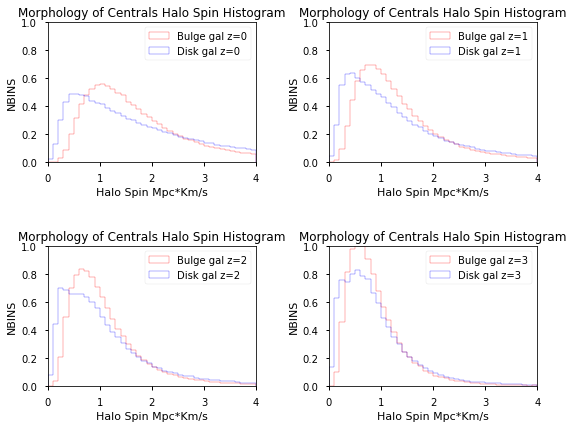

In [157]:
#Histogram
plt.figure(figsize=(10, 8))
binwidth = 0.1
dmin = 0.0
dmax = 4.0
NBINS = np.arange(dmin, dmax + binwidth, binwidth)
fig = plt.figure(facecolor='white')

plt.subplot(221)
no_halos_hist = plt.hist(bulgedom_cen_Sage['spin_z0'], NBINS, normed=True, histtype = 'step', color='r', label='Bulge gal z=0')
no_halos_hist = plt.hist(diskdom_cen_Sage['spin_z0'], NBINS, normed=True, histtype = 'step', color='b', label='Disk gal z=0')
plt.xlim(0, 4)
plt.ylim(0, 1)
plt.xlabel('Halo Spin Mpc*Km/s')
plt.ylabel('NBINS')
plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)

plt.subplot(222)
no_halos_hist = plt.hist(bulgedom_cen_Sage['spin_z1'], NBINS, normed=True, histtype = 'step', color='r', label='Bulge gal z=1')
no_halos_hist = plt.hist(diskdom_cen_Sage['spin_z1'], NBINS, normed=True, histtype = 'step', color='b', label='Disk gal z=1')
plt.xlim(0, 4)
plt.ylim(0, 1)
plt.xlabel('Halo Spin Mpc*Km/s')
plt.ylabel('NBINS')
plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)

plt.subplot(223)
no_halos_hist = plt.hist(bulgedom_cen_Sage['spin_z2'], NBINS, normed=True, histtype = 'step', color='r', label='Bulge gal z=2')
no_halos_hist = plt.hist(diskdom_cen_Sage['spin_z2'], NBINS, normed=True, histtype = 'step', color='b', label='Disk gal z=2')
plt.xlim(0, 4)
plt.ylim(0, 1)
plt.xlabel('Halo Spin Mpc*Km/s')
plt.ylabel('NBINS')
plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)

plt.subplot(224)
no_halos_hist = plt.hist(bulgedom_cen_Sage['spin_z3'], NBINS, normed=True, histtype = 'step', color='r', label='Bulge gal z=3')
no_halos_hist = plt.hist(diskdom_cen_Sage['spin_z3'], NBINS, normed=True, histtype = 'step', color='b', label='Disk gal z=3')
plt.xlim(0, 4)
plt.ylim(0, 1)
plt.xlabel('Halo Spin Mpc*Km/s')
plt.ylabel('NBINS')
plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)

plt.subplots_adjust(top=0.92, bottom=0.001, left=0.10, right=0.95, hspace=0.6,
                    wspace=0.35)

plt.style.use('seaborn-notebook')
#plt.savefig('morph_Centrals_HaloSpin_histo_SAGE_z0toz3.png')
plt.show()


In [158]:
# creating a normalized histogram for central bulge and disk spin
Nbins_global = 100
Nbins_small = 30     #this is in case some samples need a more refined binning
dmin = 0.0
dmax = 4.0
binwidth_cen = float((dmax-dmin)/Nbins_global)
binwidth_cen_s = float((dmax-dmin)/Nbins_small)    #this is in case some samples need a more refined binning
bins_cen = np.linspace(dmin, dmax, Nbins_global+1)
bins_cen_s = np.linspace(dmin, dmax, Nbins_small + 1)  #this is in case some samples need a more refined binning



def normalizing(a):
    
    Ntotal_cen = float(len(a))
    hist_arg1_cen = np.histogram(a, bins_cen)
    hist_cen = hist_arg1_cen[0]/(binwidth_cen*Ntotal_cen)   #to have the same probability for different width sizes, divide by delta d which is your width length 
    return hist_cen


bulgenorm_cen_Sage = {}
for n in range(len(bulge_gal_cen_Sage)):
    bulgenorm_cen_Sage['hist_z{0}'.format(n)] = normalizing(bulgedom_cen_Sage['spin_z{0}'.format(n)])

      
disknorm_cen_Sage = {}
for m in range(len(disk_gal_cen_Sage)):
    disknorm_cen_Sage['hist_z{0}'.format(m)] = normalizing(diskdom_cen_Sage['spin_z{0}'.format(m)])


bins_cen = bins_cen[0:-1]      # + binwidth*0.5 plt.step does this for you. This is to center the number of points to the centre
bins_cen_s = bins_cen_s[0:-1]    #this is in case some samples need a more refined binning


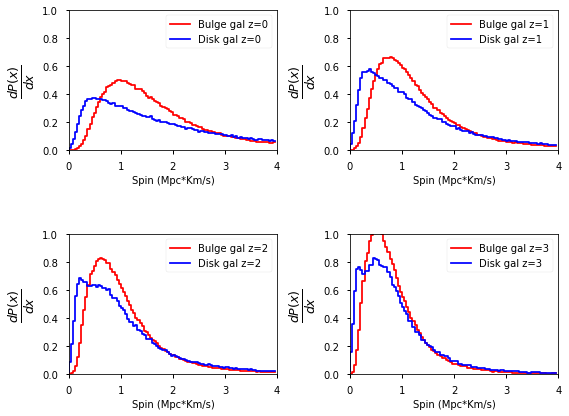

In [159]:

plt.figure(figsize=(10, 8))
fig = plt.figure(facecolor='white')

plt.subplot(221)
plt.step(bins_cen, bulgenorm_cen_Sage['hist_z0'], color='r', label='Bulge gal z=0')
plt.step(bins_cen, disknorm_cen_Sage['hist_z0'], color='b', label='Disk gal z=0')
plt.xlim(0, 4)
plt.ylim(0, 1)
plt.xlabel('Spin (Mpc*Km/s)', fontsize=10)
plt.ylabel(r'$\frac{dP(x)}{dx}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)

plt.subplot(222)
plt.step(bins_cen, bulgenorm_cen_Sage['hist_z1'], color='r', label='Bulge gal z=1')
plt.step(bins_cen, disknorm_cen_Sage['hist_z1'], color='b', label='Disk gal z=1')
plt.xlim(0, 4)
plt.ylim(0, 1)
plt.xlabel('Spin (Mpc*Km/s)', fontsize=10)
plt.ylabel(r'$\frac{dP(x)}{dx}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)


plt.subplot(223)
plt.step(bins_cen, bulgenorm_cen_Sage['hist_z2'], color='r', label='Bulge gal z=2')
plt.step(bins_cen, disknorm_cen_Sage['hist_z2'], color='b', label='Disk gal z=2')
plt.xlim(0, 4)
plt.ylim(0, 1)
plt.xlabel('Spin (Mpc*Km/s)', fontsize=10)
plt.ylabel(r'$\frac{dP(x)}{dx}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)



plt.subplot(224)
plt.step(bins_cen, bulgenorm_cen_Sage['hist_z3'], color='r', label='Bulge gal z=3')
plt.step(bins_cen, disknorm_cen_Sage['hist_z3'], color='b', label='Disk gal z=3')
plt.xlim(0, 4)
plt.ylim(0, 1)
plt.xlabel('Spin (Mpc*Km/s)', fontsize=10)
plt.ylabel(r'$\frac{dP(x)}{dx}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)




plt.subplots_adjust(top=0.92, bottom=0.001, left=0.10, right=0.95, hspace=0.6,
                    wspace=0.35)
plt.style.use('seaborn-notebook')
#plt.savefig('morph_Centrals_HaloSpin_histonorm_SAGE_z0toz3.png')

plt.show()

# Binning Stellar Mass 

In [160]:
##################################### BULGE MASS #################################
bulgemassbin_cen_Sage = {}
i=0
    
for i in range(len(bulge_gal_cen_Sage)):
    bulgemassbin_cen_Sage["bulge_idx_z{0}_SM7_8".format(i)] = np.where(np.logical_and(bulgedom_cen_Sage["TSM_z{0}".format(i)] >= 1e7, 
                                                                                     bulgedom_cen_Sage["TSM_z{0}".format(i)] <= 1e8))[0]
    
    bulgemassbin_cen_Sage["bulge_idx_z{0}_SM8_9".format(i)] = np.where(np.logical_and(bulgedom_cen_Sage["TSM_z{0}".format(i)] > 1e8, 
                                                                                     bulgedom_cen_Sage["TSM_z{0}".format(i)] <= 1e9))[0]
    
    bulgemassbin_cen_Sage["bulge_idx_z{0}_SM9_10".format(i)] = np.where(np.logical_and(bulgedom_cen_Sage["TSM_z{0}".format(i)] > 1e9, 
                                                                                     bulgedom_cen_Sage["TSM_z{0}".format(i)] <= 1e10))[0]

    bulgemassbin_cen_Sage["bulge_idx_z{0}_SM10_11".format(i)] = np.where(np.logical_and(bulgedom_cen_Sage["TSM_z{0}".format(i)] > 1e10, 
                                                                                     bulgedom_cen_Sage["TSM_z{0}".format(i)] <= 1e11))[0]

    bulgemassbin_cen_Sage["bulge_idx_z{0}_SM11_12".format(i)] = np.where(np.logical_and(bulgedom_cen_Sage["TSM_z{0}".format(i)] > 1e11, 
                                                                                     bulgedom_cen_Sage["TSM_z{0}".format(i)] <= 1e12))[0]

    
    bulgemassbin_cen_Sage["bulgedom_z{0}_SM7_8".format(i)] = bulge_gal_cen_Sage[i][bulgemassbin_cen_Sage["bulge_idx_z{0}_SM7_8".format(i)]]
    bulgemassbin_cen_Sage["bulgedom_z{0}_SM8_9".format(i)] = bulge_gal_cen_Sage[i][bulgemassbin_cen_Sage["bulge_idx_z{0}_SM8_9".format(i)]]
    bulgemassbin_cen_Sage["bulgedom_z{0}_SM9_10".format(i)] = bulge_gal_cen_Sage[i][bulgemassbin_cen_Sage["bulge_idx_z{0}_SM9_10".format(i)]]
    bulgemassbin_cen_Sage["bulgedom_z{0}_SM10_11".format(i)] = bulge_gal_cen_Sage[i][bulgemassbin_cen_Sage["bulge_idx_z{0}_SM10_11".format(i)]]
    bulgemassbin_cen_Sage["bulgedom_z{0}_SM11_12".format(i)] = bulge_gal_cen_Sage[i][bulgemassbin_cen_Sage["bulge_idx_z{0}_SM11_12".format(i)]]


In [161]:
################################################ DISK MASS ####################################################
diskmassbin_cen_Sage = {}
i=0
    
for i in range(len(disk_gal_cen_Sage)):
    diskmassbin_cen_Sage["disk_idx_z{0}_SM7_8".format(i)] = np.where(np.logical_and(diskdom_cen_Sage["TSM_z{0}".format(i)] >= 1e7, 
                                                                                     diskdom_cen_Sage["TSM_z{0}".format(i)] <= 1e8))[0]
    
    diskmassbin_cen_Sage["disk_idx_z{0}_SM8_9".format(i)] = np.where(np.logical_and(diskdom_cen_Sage["TSM_z{0}".format(i)] > 1e8, 
                                                                                     diskdom_cen_Sage["TSM_z{0}".format(i)] <= 1e9))[0]
    
    diskmassbin_cen_Sage["disk_idx_z{0}_SM9_10".format(i)] = np.where(np.logical_and(diskdom_cen_Sage["TSM_z{0}".format(i)] > 1e9, 
                                                                                     diskdom_cen_Sage["TSM_z{0}".format(i)] <= 1e10))[0]

    diskmassbin_cen_Sage["disk_idx_z{0}_SM10_11".format(i)] = np.where(np.logical_and(diskdom_cen_Sage["TSM_z{0}".format(i)] > 1e10, 
                                                                                     diskdom_cen_Sage["TSM_z{0}".format(i)] <= 1e11))[0]

    diskmassbin_cen_Sage["disk_idx_z{0}_SM11_12".format(i)] = np.where(np.logical_and(diskdom_cen_Sage["TSM_z{0}".format(i)] > 1e11, 
                                                                                     diskdom_cen_Sage["TSM_z{0}".format(i)] <= 1e12))[0]

    
    diskmassbin_cen_Sage["diskdom_z{0}_SM7_8".format(i)] = disk_gal_cen_Sage[i][diskmassbin_cen_Sage["disk_idx_z{0}_SM7_8".format(i)]]
    diskmassbin_cen_Sage["diskdom_z{0}_SM8_9".format(i)] = disk_gal_cen_Sage[i][diskmassbin_cen_Sage["disk_idx_z{0}_SM8_9".format(i)]]
    diskmassbin_cen_Sage["diskdom_z{0}_SM9_10".format(i)] = disk_gal_cen_Sage[i][diskmassbin_cen_Sage["disk_idx_z{0}_SM9_10".format(i)]]
    diskmassbin_cen_Sage["diskdom_z{0}_SM10_11".format(i)] = disk_gal_cen_Sage[i][diskmassbin_cen_Sage["disk_idx_z{0}_SM10_11".format(i)]]
    diskmassbin_cen_Sage["diskdom_z{0}_SM11_12".format(i)] = disk_gal_cen_Sage[i][diskmassbin_cen_Sage["disk_idx_z{0}_SM11_12".format(i)]]




#diskdom_idx_cen_z0Sage_M7_8 = np.where(np.logical_and(diskTSM_cen_z0Sage >= 1e7, diskTSM_cen_z0Sage <= 1e8))[0]
#diskdom_cen_z0Sage_M7_8 = diskdom_cen_z0Sage[diskdom_idx_cen_z0Sage_M7_8]

In [162]:
#bulgemassbin_cen_Sage['bulgedom_M7_8_z0']['Total_Stellar_Mass']
"""
i = 0
j = 7

hello = "M_{0}_{1}_{2}".format(i,j,j+1)
print hello
"""
#bulgebin_cen_Sage["Mvir_z{0}_M{1}_{2}".format(i,j,j+1)] = 1e10*bulgemassbin_cen_Sage['bulgedom_z{0}_M{1}_{2}'.format(i,j,j+1)]['Mvir']
#print bulgebin_cen_Sage['Mvir_z0_M7_8']

'\ni = 0\nj = 7\n\nhello = "M_{0}_{1}_{2}".format(i,j,j+1)\nprint hello\n'

In [163]:
#bulge_gal_cen_Sage = [bulgedom_cen_z0Sage, bulgedom_cen_z1Sage, bulgedom_cen_z2Sage, bulgedom_cen_z3Sage]
i = 0
for i in range(len(bulge_gal_cen_Sage)):
    for j in range(5):
        j = j+ 7
        bulgedom_cen_Sage["Mvir_z{0}_SM{1}_{2}".format(i,j,j+1)] = 1e10*bulgemassbin_cen_Sage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Mvir']
        bulgedom_cen_Sage["TSM_z{0}_SM{1}_{2}".format(i,j,j+1)] = 1e10*bulgemassbin_cen_Sage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Total_Stellar_Mass']
        bulgedom_cen_Sage["CGMvir_z{0}_SM{1}_{2}".format(i,j,j+1)] = 1e10*bulgemassbin_cen_Sage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Central_Galaxy_Mvir']
        bulgedom_cen_Sage["Vvir_z{0}_SM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_Sage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Vvir']
        bulgedom_cen_Sage["Rvir_z{0}_SM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_Sage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Rvir']
        bulgedom_cen_Sage["xpos_z{0}_SM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_Sage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['X']
        bulgedom_cen_Sage["ypos_z{0}_SM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_Sage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Y']
        bulgedom_cen_Sage["zpos_z{0}_SM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_Sage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Z']
        bulgedom_cen_Sage["xvel_z{0}_SM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_Sage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['X_Velocity']
        bulgedom_cen_Sage["yvel_z{0}_SM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_Sage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Y_Velocity']
        bulgedom_cen_Sage["zvel_z{0}_SM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_Sage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Z_Velocity']
        bulgedom_cen_Sage["xspin_z{0}_SM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_Sage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['X_Spin']
        bulgedom_cen_Sage["yspin_z{0}_SM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_Sage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Y_Spin']
        bulgedom_cen_Sage["zspin_z{0}_SM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_Sage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Z_Spin']
    
        bulgedom_cen_Sage["pos_z{0}_SM{1}_{2}".format(i,j,j+1)] = np.sqrt(bulgedom_cen_Sage['xpos_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_Sage['ypos_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_Sage['zpos_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2)
    
        bulgedom_cen_Sage["vel_z{0}_SM{1}_{2}".format(i,j,j+1)] = np.sqrt(bulgedom_cen_Sage['xvel_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_Sage['yvel_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_Sage['zvel_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2)
    
        bulgedom_cen_Sage["spin_z{0}_SM{1}_{2}".format(i,j,j+1)] = np.sqrt(bulgedom_cen_Sage['xspin_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_Sage['yspin_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_Sage['zspin_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2)
                                                    
                                                    


In [164]:
#disk_gal_cen_Sage = [diskdom_cen_z0Sage, diskdom_cen_z1Sage, diskdom_cen_z2Sage, diskdom_cen_z3Sage]
i=0
j=0
for i in range(len(disk_gal_cen_Sage)):
    for j in range(5):
        j = j + 7
        diskdom_cen_Sage["Mvir_z{0}_SM{1}_{2}".format(i,j,j+1)] = 1e10*diskmassbin_cen_Sage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Mvir']
        diskdom_cen_Sage["TSM_z{0}_SM{1}_{2}".format(i,j,j+1)] = 1e10*diskmassbin_cen_Sage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Total_Stellar_Mass']
        diskdom_cen_Sage["CGMvir_z{0}_SM{1}_{2}".format(i,j,j+1)] = 1e10*diskmassbin_cen_Sage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Central_Galaxy_Mvir']
        diskdom_cen_Sage["Vvir_z{0}_SM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_Sage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Vvir']
        diskdom_cen_Sage["Rvir_z{0}_SM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_Sage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Rvir']            
        diskdom_cen_Sage["xpos_z{0}_SM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_Sage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['X']
        diskdom_cen_Sage["ypos_z{0}_SM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_Sage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Y']
        diskdom_cen_Sage["zpos_z{0}_SM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_Sage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Z']
        diskdom_cen_Sage["xvel_z{0}_SM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_Sage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['X_Velocity']
        diskdom_cen_Sage["yvel_z{0}_SM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_Sage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Y_Velocity']
        diskdom_cen_Sage["zvel_z{0}_SM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_Sage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Z_Velocity']
        diskdom_cen_Sage["xspin_z{0}_SM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_Sage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['X_Spin']
        diskdom_cen_Sage["yspin_z{0}_SM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_Sage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Y_Spin']
        diskdom_cen_Sage["zspin_z{0}_SM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_Sage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Z_Spin']
    
        diskdom_cen_Sage["pos_z{0}_SM{1}_{2}".format(i,j,j+1)] = np.sqrt(diskdom_cen_Sage['xpos_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    diskdom_cen_Sage['ypos_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    diskdom_cen_Sage['zpos_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2)
    
        diskdom_cen_Sage["vel_z{0}_SM{1}_{2}".format(i,j,j+1)] = np.sqrt(diskdom_cen_Sage['xvel_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    diskdom_cen_Sage['yvel_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    diskdom_cen_Sage['zvel_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2)
    
        diskdom_cen_Sage["spin_z{0}_SM{1}_{2}".format(i,j,j+1)] = np.sqrt(diskdom_cen_Sage['xspin_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    diskdom_cen_Sage['yspin_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    diskdom_cen_Sage['zspin_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2)

In [165]:
# creating a normalized histogram for central bulge and disk spin
Nbins_global = 50
Nbins_small = 30     #this is in case some samples need a more refined binning
dmin = 0.0
dmax = 4.0
binwidth_cen = float((dmax-dmin)/Nbins_global)
binwidth_cen_s = float((dmax-dmin)/Nbins_small)    #this is in case some samples need a more refined binning
bins_cen = np.linspace(dmin, dmax, Nbins_global+1)
bins_cen_s = np.linspace(dmin, dmax, Nbins_small + 1)  #this is in case some samples need a more refined binning

n1=0
n2=0
m1=0
m2=0

for n1 in range(len(bulge_gal_cen_Sage)):
    for n2 in range(5):
        n2 = n2 + 7
        bulgenorm_cen_Sage['hist_z{0}_SM{1}_{2}'.format(n1,n2,n2+1)] = normalizing(bulgedom_cen_Sage['spin_z{0}_SM{1}_{2}'.format(n1,n2,n2+1)])

    
for m1 in range(len(disk_gal_cen_Sage)):
    for m2 in range(5):
        m2 = m2 + 7
        disknorm_cen_Sage['hist_z{0}_SM{1}_{2}'.format(m1,m2,m2+1)] = normalizing(diskdom_cen_Sage['spin_z{0}_SM{1}_{2}'.format(m1,m2,m2+1)])


bins_cen = bins_cen[0:-1]      # + binwidth*0.5 plt.step does this for you. This is to center the number of points to the centre
bins_cen_s = bins_cen_s[0:-1]    #this is in case some samples need a more refined binning


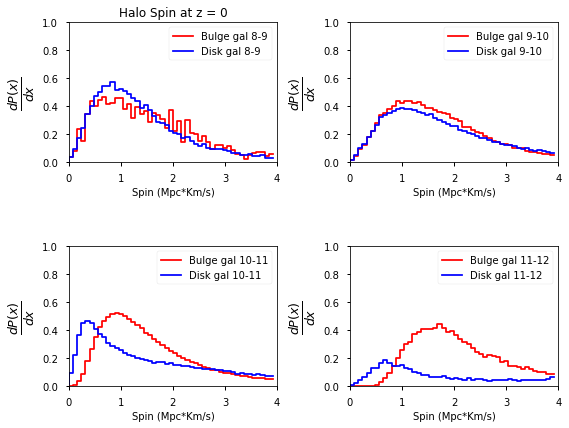

In [166]:
plt.figure(figsize=(10, 8))
fig = plt.figure(facecolor='white')

plt.subplot(221)
plt.step(bins_cen, bulgenorm_cen_Sage['hist_z0_SM8_9'], color='r', label='Bulge gal 8-9')
plt.step(bins_cen, disknorm_cen_Sage['hist_z0_SM8_9'], color='b', label='Disk gal 8-9')
plt.xlim(0, 4)
plt.ylim(0, 1)
plt.xlabel('Spin (Mpc*Km/s)', fontsize=10)
plt.ylabel(r'$\frac{dP(x)}{dx}$', fontsize=18)
plt.title('Halo Spin at z = 0')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)



plt.subplot(222)
plt.step(bins_cen, bulgenorm_cen_Sage['hist_z0_SM9_10'], color='r', label='Bulge gal 9-10')
plt.step(bins_cen, disknorm_cen_Sage['hist_z0_SM9_10'], color='b', label='Disk gal 9-10')
plt.xlim(0, 4)
plt.ylim(0, 1)
plt.xlabel('Spin (Mpc*Km/s)', fontsize=10)
plt.ylabel(r'$\frac{dP(x)}{dx}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)


plt.subplot(223)
plt.step(bins_cen, bulgenorm_cen_Sage['hist_z0_SM10_11'], color='r', label='Bulge gal 10-11')
plt.step(bins_cen, disknorm_cen_Sage['hist_z0_SM10_11'], color='b', label='Disk gal 10-11')
plt.xlim(0, 4)
plt.ylim(0, 1)
plt.xlabel('Spin (Mpc*Km/s)', fontsize=10)
plt.ylabel(r'$\frac{dP(x)}{dx}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)



plt.subplot(224)
plt.step(bins_cen, bulgenorm_cen_Sage['hist_z0_SM11_12'], color='r', label='Bulge gal 11-12')
plt.step(bins_cen, disknorm_cen_Sage['hist_z0_SM11_12'], color='b', label='Disk gal 11-12')
plt.xlim(0, 4)
plt.ylim(0, 1)
plt.xlabel('Spin (Mpc*Km/s)', fontsize=10)
plt.ylabel(r'$\frac{dP(x)}{dx}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)




plt.subplots_adjust(top=0.92, bottom=0.001, left=0.10, right=0.95, hspace=0.6,
                    wspace=0.35)
plt.style.use('seaborn-notebook')
#plt.savefig('morph_Centrals_Massbinning_HaloSpin_histonorm_SAGE_z0.png')

plt.show()

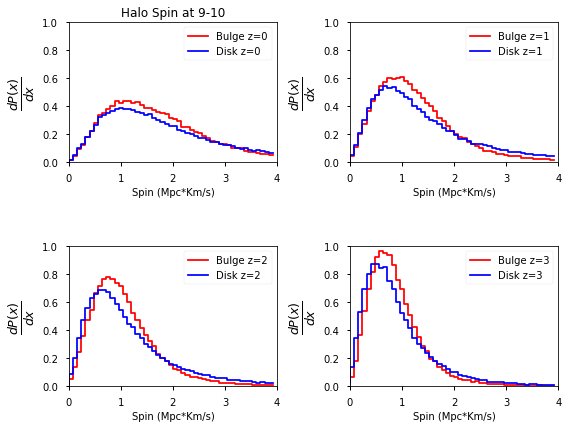

In [167]:
plt.figure(figsize=(10, 8))
fig = plt.figure(facecolor='white')

plt.subplot(221)
plt.step(bins_cen, bulgenorm_cen_Sage['hist_z0_SM9_10'], color='r', label='Bulge z=0')
plt.step(bins_cen, disknorm_cen_Sage['hist_z0_SM9_10'], color='b', label='Disk z=0')
plt.xlim(0, 4)
plt.ylim(0, 1)
plt.xlabel('Spin (Mpc*Km/s)', fontsize=10)
plt.ylabel(r'$\frac{dP(x)}{dx}$', fontsize=18)
plt.title('Halo Spin at 9-10')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)

plt.subplot(222)
plt.step(bins_cen,  bulgenorm_cen_Sage['hist_z1_SM9_10'], color='r', label='Bulge z=1')
plt.step(bins_cen,  disknorm_cen_Sage['hist_z1_SM9_10'], color='b', label='Disk z=1')
plt.xlim(0, 4)
plt.ylim(0, 1)
plt.xlabel('Spin (Mpc*Km/s)', fontsize=10)
plt.ylabel(r'$\frac{dP(x)}{dx}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)


plt.subplot(223)
plt.step(bins_cen, bulgenorm_cen_Sage['hist_z2_SM9_10'], color='r', label='Bulge z=2')
plt.step(bins_cen, disknorm_cen_Sage['hist_z2_SM9_10'], color='b', label='Disk z=2')
plt.xlim(0, 4)
plt.ylim(0, 1)
plt.xlabel('Spin (Mpc*Km/s)', fontsize=10)
plt.ylabel(r'$\frac{dP(x)}{dx}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)



plt.subplot(224)
plt.step(bins_cen, bulgenorm_cen_Sage['hist_z3_SM9_10'], color='r', label='Bulge z=3')
plt.step(bins_cen, disknorm_cen_Sage['hist_z3_SM9_10'], color='b', label='Disk z=3')
plt.xlim(0, 4)
plt.ylim(0, 1)
plt.xlabel('Spin (Mpc*Km/s)', fontsize=10)
plt.ylabel(r'$\frac{dP(x)}{dx}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)




plt.subplots_adjust(top=0.92, bottom=0.001, left=0.10, right=0.95, hspace=0.6,
                    wspace=0.35)
plt.style.use('seaborn-notebook')
#plt.savefig('morph_Centrals_HaloSpin_histonorm_SAGE_M9_10_z0toz3.png')

plt.show()


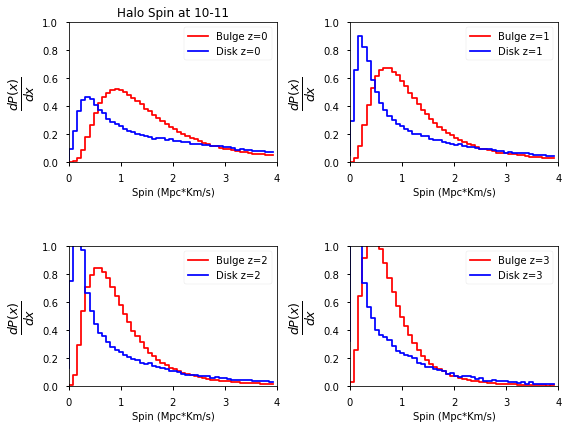

In [168]:
plt.figure(figsize=(10, 8))
fig = plt.figure(facecolor='white')

plt.subplot(221)
plt.step(bins_cen, bulgenorm_cen_Sage['hist_z0_SM10_11'], color='r', label='Bulge z=0')
plt.step(bins_cen, disknorm_cen_Sage['hist_z0_SM10_11'], color='b', label='Disk z=0')
plt.xlim(0, 4)
plt.ylim(0, 1)
plt.xlabel('Spin (Mpc*Km/s)', fontsize=10)
plt.ylabel(r'$\frac{dP(x)}{dx}$', fontsize=18)
plt.title('Halo Spin at 10-11')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)

plt.subplot(222)
plt.step(bins_cen, bulgenorm_cen_Sage['hist_z1_SM10_11'], color='r', label='Bulge z=1')
plt.step(bins_cen, disknorm_cen_Sage['hist_z1_SM10_11'], color='b', label='Disk z=1')
plt.xlim(0, 4)
plt.ylim(0, 1)
plt.xlabel('Spin (Mpc*Km/s)', fontsize=10)
plt.ylabel(r'$\frac{dP(x)}{dx}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)


plt.subplot(223)
plt.step(bins_cen, bulgenorm_cen_Sage['hist_z2_SM10_11'], color='r', label='Bulge z=2')
plt.step(bins_cen, disknorm_cen_Sage['hist_z2_SM10_11'], color='b', label='Disk z=2')
plt.xlim(0, 4)
plt.ylim(0, 1)
plt.xlabel('Spin (Mpc*Km/s)', fontsize=10)
plt.ylabel(r'$\frac{dP(x)}{dx}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)



plt.subplot(224)
plt.step(bins_cen, bulgenorm_cen_Sage['hist_z3_SM10_11'], color='r', label='Bulge z=3')
plt.step(bins_cen, disknorm_cen_Sage['hist_z3_SM10_11'], color='b', label='Disk z=3')
plt.xlim(0, 4)
plt.ylim(0, 1)
plt.xlabel('Spin (Mpc*Km/s)', fontsize=10)
plt.ylabel(r'$\frac{dP(x)}{dx}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)




plt.subplots_adjust(top=0.92, bottom=0.001, left=0.10, right=0.95, hspace=0.6,
                    wspace=0.35)
plt.style.use('seaborn-notebook')
#plt.savefig('morph_Centrals_HaloSpin_histonorm_SAGE_M10_11_z0toz3.png')

plt.show()

# Calculating lambda spin

In [169]:
i = 0
j = 0
for i in range(len(bulge_gal_cen_Sage)):
    for j in range(5):
        j = j + 7        
        bulgedom_cen_Sage["lambda_z{0}_SM{1}_{2}".format(i,j,j+1)] = bulgedom_cen_Sage["spin_z{0}_SM{1}_{2}".format(i,j,j+1)]/(np.sqrt(2)*bulgedom_cen_Sage["Vvir_z{0}_SM{1}_{2}".format(i,j,j+1)]*
                                                                bulgedom_cen_Sage["Rvir_z{0}_SM{1}_{2}".format(i,j,j+1)])


n1 = 0
n2 = 0
for n1 in range(len(disk_gal_cen_Sage)):
    for n2 in range(5):
        n2 = n2 + 7
        diskdom_cen_Sage["lambda_z{0}_SM{1}_{2}".format(n1,n2,n2+1)] = diskdom_cen_Sage["spin_z{0}_SM{1}_{2}".format(n1,n2,n2+1)]/(np.sqrt(2)*diskdom_cen_Sage["Vvir_z{0}_SM{1}_{2}".format(n1,n2,n2+1)]*
                                                                diskdom_cen_Sage["Rvir_z{0}_SM{1}_{2}".format(n1,n2,n2+1)])

      

In [170]:
print len(bulgedom_cen_Sage['lambda_z0_SM11_12'])

24339


In [171]:
# creating a normalized histogram for central bulge and disk spin
Nbins_global = 20
Nbins_small = 30     #this is in case some samples need a more refined binning
dmin = 0.0
dmax = 0.175
binwidth_cen = float((dmax-dmin)/Nbins_global)
binwidth_cen_s = float((dmax-dmin)/Nbins_small)    #this is in case some samples need a more refined binning
bins_cen = np.linspace(dmin, dmax, Nbins_global+1)
bins_cen_s = np.linspace(dmin, dmax, Nbins_small + 1)  #this is in case some samples need a more refined binning

n1 = 0
n2 = 0
m1 = 0
m2 = 0

for n1 in range(len(bulge_gal_cen_Sage)):
    for n2 in range(5):
        n2 = n2 + 7
        bulgenorm_cen_Sage['lambdahist_z{0}_SM{1}_{2}'.format(n1,n2,n2+1)] = normalizing(bulgedom_cen_Sage['lambda_z{0}_SM{1}_{2}'.format(n1,n2,n2+1)])

    
for m1 in range(len(disk_gal_cen_Sage)):
    for m2 in range(5):
        m2 = m2 + 7
        disknorm_cen_Sage['lambdahist_z{0}_SM{1}_{2}'.format(m1,m2,m2+1)] = normalizing(diskdom_cen_Sage['lambda_z{0}_SM{1}_{2}'.format(m1,m2,m2+1)])


bins_cen = bins_cen[0:-1]      # + binwidth*0.5 plt.step does this for you. This is to center the number of points to the centre
bins_cen_s = bins_cen_s[0:-1]    #this is in case some samples need a more refined binning


In [172]:
print len(bulgedom_cen_Sage['lambda_z2_SM9_10'])
print len(diskdom_cen_Sage['lambda_z3_SM9_10'])

61887
54784


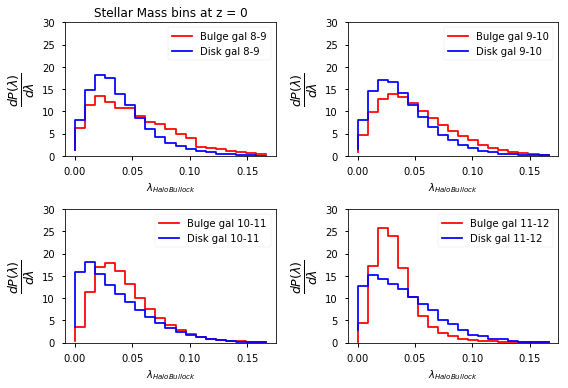

In [173]:
plt.figure(figsize=(10, 8))
fig = plt.figure(facecolor='white')

plt.subplot(221)
plt.step(bins_cen, bulgenorm_cen_Sage['lambdahist_z0_SM8_9'], color='r', label='Bulge gal 8-9')
plt.step(bins_cen, disknorm_cen_Sage['lambdahist_z0_SM8_9'], color='b', label='Disk gal 8-9')
plt.xticks([0, 0.05, 0.1, 0.15])
#plt.xlim(0, 0.15)
plt.ylim(0, 30)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
plt.title('Stellar Mass bins at z = 0')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)



plt.subplot(222)
plt.step(bins_cen, bulgenorm_cen_Sage['lambdahist_z0_SM9_10'], color='r', label='Bulge gal 9-10')
plt.step(bins_cen, disknorm_cen_Sage['lambdahist_z0_SM9_10'], color='b', label='Disk gal 9-10')
plt.xticks([0, 0.05, 0.1, 0.15])
#plt.xlim(0, 0.15)
plt.ylim(0, 30)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)


plt.subplot(223)
plt.step(bins_cen, bulgenorm_cen_Sage['lambdahist_z0_SM10_11'], color='r', label='Bulge gal 10-11')
plt.step(bins_cen, disknorm_cen_Sage['lambdahist_z0_SM10_11'], color='b', label='Disk gal 10-11')
plt.xticks([0, 0.05, 0.1, 0.15])
#plt.xlim(0, 0.15)
plt.ylim(0, 30)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)



plt.subplot(224)
plt.step(bins_cen, bulgenorm_cen_Sage['lambdahist_z0_SM11_12'], color='r', label='Bulge gal 11-12')
plt.step(bins_cen, disknorm_cen_Sage['lambdahist_z0_SM11_12'], color='b', label='Disk gal 11-12')
plt.xticks([0, 0.05, 0.1, 0.15])
#plt.xlim(0,0.15)
plt.ylim(0, 30)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)




plt.subplots_adjust(top=0.92, bottom=0.001, left=0.10, right=0.95, hspace=0.6,
                    wspace=0.35)
plt.style.use('seaborn-notebook')
plt.tight_layout()
#plt.savefig('morph_Centrals_HaloSpin_histonorm_SAGE_SMbin8-12_z0.png')

plt.show()

In [174]:
import matplotlib.gridspec as gridspec

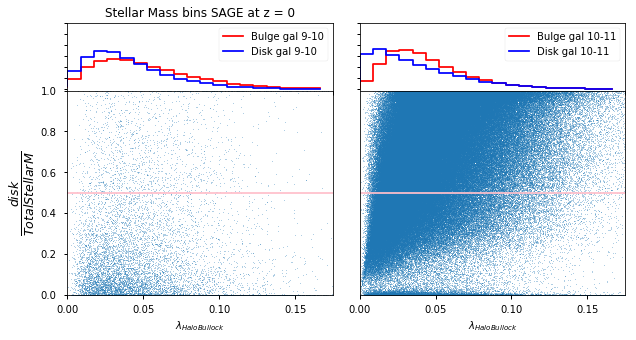

In [175]:
f = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(2, 2,
                       width_ratios=[1, 1],
                       height_ratios=[1, 3],
                       hspace=0, wspace=0.1)    
    
    
    
ax1 = plt.subplot(gs[0])
ax1.step(bins_cen, bulgenorm_cen_Sage['lambdahist_z0_SM9_10'], color='r', label='Bulge gal 9-10')
ax1.step(bins_cen, disknorm_cen_Sage['lambdahist_z0_SM9_10'], color='b', label='Disk gal 9-10')
ax1.axes.get_xaxis().set_ticks([0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175])
ax1.axes.get_yaxis().set_ticks([0, 5, 10, 15, 20, 25, 30])
ax1.axes.xaxis.set_ticklabels([])
ax1.axes.yaxis.set_ticklabels([])
ax1.legend(loc=1)
plt.title('Stellar Mass bins SAGE at z = 0')

ax2 = plt.subplot(gs[1], sharex=ax1)
ax2.step(bins_cen, bulgenorm_cen_Sage['lambdahist_z0_SM10_11'], color='r', label='Bulge gal 10-11')
ax2.step(bins_cen, disknorm_cen_Sage['lambdahist_z0_SM10_11'], color='b', label='Disk gal 10-11')

ax2.set_xlim(0, 0.175)
ax2.axes.get_xaxis().set_ticks([0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175])
ax2.axes.get_yaxis().set_ticks([0, 5, 10, 15, 20, 25, 30])
ax2.axes.xaxis.set_ticklabels([])
ax2.axes.yaxis.set_ticklabels([])
ax2.legend(loc=1)

ax3 = plt.subplot(gs[2])
ax3.plot(gal_cen_Sage['gal_hlambda_z0_SM8_9'],gal_cen_Sage['morph_z0_SM8_9'],'.', markersize=1)
ax3.axhline(0.5, c ='pink')
ax3.set_xlim(0, 0.175)
ax3.set_ylim(0, 1)
ax3.axes.get_xaxis().set_ticks([0, 0.05, 0.1, 0.15])
#ax3.axes.get_yaxis().set_ticks([])
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{disk}{TotalStellarM}$', fontsize=18)


ax4 = plt.subplot(gs[3], sharex=ax3)
ax4.plot(gal_cen_Sage['gal_hlambda_z0_SM10_11'],gal_cen_Sage['morph_z0_SM10_11'], '.', markersize=1)
ax4.axhline(0.5, c ='pink')
ax4.set_ylim(0, 1)
ax4.set_xlim(0,0.175)
ax4.axes.get_xaxis().set_ticks([0, 0.05, 0.1, 0.15])
ax4.axes.get_yaxis().set_ticks([])
#ax4.axes.xaxis.set_ticklabels([])
#ax4.axes.yaxis.set_ticklabels([])
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)

#ax5 = plt.subplot(gs[4])
#ax6 = plt.subplot(gs[5])
#ax7 = plt.subplot(gs[6])
#ax8 = plt.subplot(gs[7])
#ax9 = plt.subplot(gs[8])
plt.style.use('seaborn-notebook')
#plt.tight_layout()
plt.savefig('morph_HaloSpin_scatterdisk_histonorm_SAGE_SMbin9-11_z0.png', dpi=100)
plt.show()

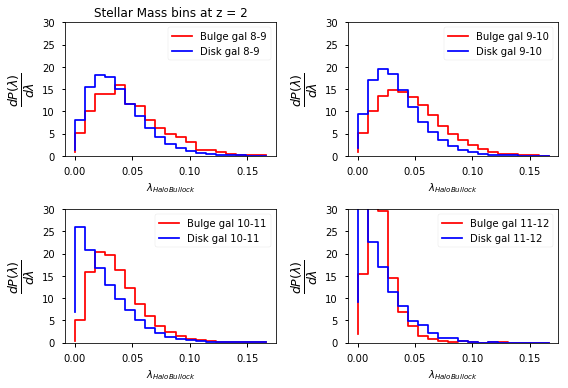

In [70]:
plt.figure(figsize=(10, 8))
fig = plt.figure(facecolor='white')

plt.subplot(221)
plt.step(bins_cen, bulgenorm_cen_Sage['lambdahist_z1_SM8_9'], color='r', label='Bulge gal 8-9')
plt.step(bins_cen, disknorm_cen_Sage['lambdahist_z1_SM8_9'], color='b', label='Disk gal 8-9')
plt.xticks([0, 0.05, 0.1, 0.15])
#plt.xlim(0, 0.15)
plt.ylim(0, 30)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
plt.title('Stellar Mass bins at z = 2')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)



plt.subplot(222)
plt.step(bins_cen, bulgenorm_cen_Sage['lambdahist_z1_SM9_10'], color='r', label='Bulge gal 9-10')
plt.step(bins_cen, disknorm_cen_Sage['lambdahist_z1_SM9_10'], color='b', label='Disk gal 9-10')
plt.xticks([0, 0.05, 0.1, 0.15])
#plt.xlim(0, 0.15)
plt.ylim(0, 30)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)


plt.subplot(223)
plt.step(bins_cen, bulgenorm_cen_Sage['lambdahist_z1_SM10_11'], color='r', label='Bulge gal 10-11')
plt.step(bins_cen, disknorm_cen_Sage['lambdahist_z1_SM10_11'], color='b', label='Disk gal 10-11')
plt.xticks([0, 0.05, 0.1, 0.15])
#plt.xlim(0, 0.15)
plt.ylim(0, 30)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)



plt.subplot(224)
plt.step(bins_cen, bulgenorm_cen_Sage['lambdahist_z1_SM11_12'], color='r', label='Bulge gal 11-12')
plt.step(bins_cen, disknorm_cen_Sage['lambdahist_z1_SM11_12'], color='b', label='Disk gal 11-12')
plt.xticks([0, 0.05, 0.1, 0.15])
#plt.xlim(0,0.15)
plt.ylim(0, 30)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)




plt.subplots_adjust(top=0.92, bottom=0.001, left=0.10, right=0.95, hspace=0.6,
                    wspace=0.35)
plt.style.use('seaborn-notebook')
plt.tight_layout()
#plt.savefig('morph_Centrals_Massbinning_HaloSpin_histonorm_SAGE_z0.png')

plt.show()

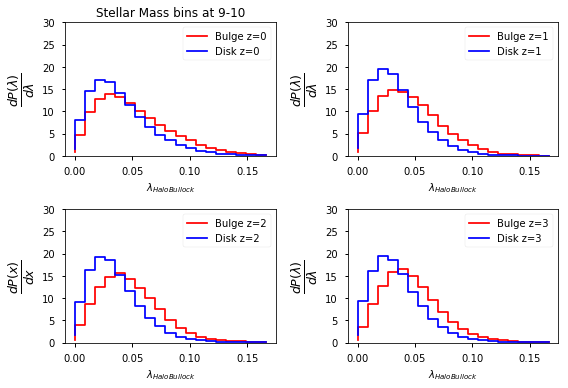

In [71]:
plt.figure(figsize=(10, 8))
fig = plt.figure(facecolor='white')

plt.subplot(221)
plt.step(bins_cen, bulgenorm_cen_Sage['lambdahist_z0_SM9_10'], color='r', label='Bulge z=0')
plt.step(bins_cen, disknorm_cen_Sage['lambdahist_z0_SM9_10'], color='b', label='Disk z=0')
plt.xticks([0, 0.05, 0.1, 0.15])
#plt.xlim(0, 4)
plt.ylim(0, 30)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
plt.title('Stellar Mass bins at 9-10')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)

plt.subplot(222)
plt.step(bins_cen,  bulgenorm_cen_Sage['lambdahist_z1_SM9_10'], color='r', label='Bulge z=1')
plt.step(bins_cen,  disknorm_cen_Sage['lambdahist_z1_SM9_10'], color='b', label='Disk z=1')
plt.xticks([0, 0.05, 0.1, 0.15])
#plt.xlim(0, 4)
plt.ylim(0, 30)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)


plt.subplot(223)
plt.step(bins_cen, bulgenorm_cen_Sage['lambdahist_z2_SM9_10'], color='r', label='Bulge z=2')
plt.step(bins_cen, disknorm_cen_Sage['lambdahist_z2_SM9_10'], color='b', label='Disk z=2')
plt.xticks([0, 0.05, 0.1, 0.15])
#plt.xlim(0, 4)
plt.ylim(0, 30)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(x)}{dx}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)



plt.subplot(224)
plt.step(bins_cen, bulgenorm_cen_Sage['lambdahist_z3_SM9_10'], color='r', label='Bulge z=3')
plt.step(bins_cen, disknorm_cen_Sage['lambdahist_z3_SM9_10'], color='b', label='Disk z=3')
plt.xticks([0, 0.05, 0.1, 0.15])
#plt.xlim(0, 0.15)
plt.ylim(0, 30)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)




plt.subplots_adjust(top=0.92, bottom=0.001, left=0.10, right=0.95, hspace=0.6,
                    wspace=0.35)
plt.style.use('seaborn-notebook')
plt.tight_layout()
#plt.savefig('morph_Centrals_HaloSpin_histonorm_SAGE_SMbin9-10_z0toz3.png')

plt.show()

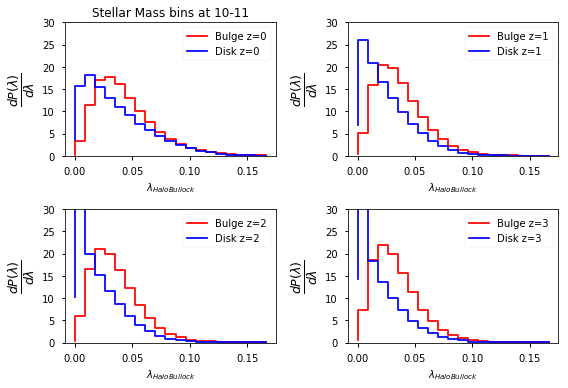

In [72]:
plt.figure(figsize=(10, 8))
fig = plt.figure(facecolor='white')

plt.subplot(221)
plt.step(bins_cen, bulgenorm_cen_Sage['lambdahist_z0_SM10_11'], color='r', label='Bulge z=0')
plt.step(bins_cen, disknorm_cen_Sage['lambdahist_z0_SM10_11'], color='b', label='Disk z=0')
plt.xticks([0, 0.05, 0.1, 0.15])
#plt.xlim(0, 4)
plt.ylim(0, 30)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
plt.title('Stellar Mass bins at 10-11')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)

plt.subplot(222)
plt.step(bins_cen, bulgenorm_cen_Sage['lambdahist_z1_SM10_11'], color='r', label='Bulge z=1')
plt.step(bins_cen, disknorm_cen_Sage['lambdahist_z1_SM10_11'], color='b', label='Disk z=1')
plt.xticks([0, 0.05, 0.1, 0.15])
#plt.xlim(0, 4)
plt.ylim(0, 30)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)


plt.subplot(223)
plt.step(bins_cen, bulgenorm_cen_Sage['lambdahist_z2_SM10_11'], color='r', label='Bulge z=2')
plt.step(bins_cen, disknorm_cen_Sage['lambdahist_z2_SM10_11'], color='b', label='Disk z=2')
plt.xticks([0, 0.05, 0.1, 0.15])
#plt.xlim(0, 4)
plt.ylim(0, 30)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)



plt.subplot(224)
plt.step(bins_cen, bulgenorm_cen_Sage['lambdahist_z3_SM10_11'], color='r', label='Bulge z=3')
plt.step(bins_cen, disknorm_cen_Sage['lambdahist_z3_SM10_11'], color='b', label='Disk z=3')
plt.xticks([0, 0.05, 0.1, 0.15])
#plt.xlim(0, 4)
plt.ylim(0, 30)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)




plt.subplots_adjust(top=0.92, bottom=0.001, left=0.10, right=0.95, hspace=0.6,
                    wspace=0.35)
plt.style.use('seaborn-notebook')
plt.tight_layout()
#plt.savefig('morph_Centrals_HaloSpin_histonorm_SAGE_SMbin10to11_z0toz3.png')

plt.show()

# Binning Halo Mass

In [73]:
##################################### BULGE MASS #################################
bulgemassbin_cen_Sage = {}
i=0
    
for i in range(len(bulge_gal_cen_Sage)):
    bulgemassbin_cen_Sage["bulge_idx_z{0}_HM11_12".format(i)] = np.where(np.logical_and(bulgedom_cen_Sage["Mvir_z{0}".format(i)] >= 1e11, 
                                                                                     bulgedom_cen_Sage["Mvir_z{0}".format(i)] <= 1e12))[0]
    
    bulgemassbin_cen_Sage["bulge_idx_z{0}_HM12_13".format(i)] = np.where(np.logical_and(bulgedom_cen_Sage["Mvir_z{0}".format(i)] > 1e12, 
                                                                                     bulgedom_cen_Sage["Mvir_z{0}".format(i)] <= 1e13))[0]
    
    bulgemassbin_cen_Sage["bulge_idx_z{0}_HM13_14".format(i)] = np.where(np.logical_and(bulgedom_cen_Sage["Mvir_z{0}".format(i)] > 1e13, 
                                                                                     bulgedom_cen_Sage["Mvir_z{0}".format(i)] <= 1e14))[0]


    bulgemassbin_cen_Sage["bulgedom_z{0}_HM11_12".format(i)] = bulge_gal_cen_Sage[i][bulgemassbin_cen_Sage["bulge_idx_z{0}_HM11_12".format(i)]]
    bulgemassbin_cen_Sage["bulgedom_z{0}_HM12_13".format(i)] = bulge_gal_cen_Sage[i][bulgemassbin_cen_Sage["bulge_idx_z{0}_HM12_13".format(i)]]
    bulgemassbin_cen_Sage["bulgedom_z{0}_HM13_14".format(i)] = bulge_gal_cen_Sage[i][bulgemassbin_cen_Sage["bulge_idx_z{0}_HM13_14".format(i)]]


In [74]:
print min(bulgedom_cen_Sage['Mvir_z0'])

400205000000.0


In [75]:
################################################ DISK MASS ####################################################
diskmassbin_cen_Sage = {}
i=0
    
for i in range(len(disk_gal_cen_Sage)):
    diskmassbin_cen_Sage["disk_idx_z{0}_HM11_12".format(i)] = np.where(np.logical_and(diskdom_cen_Sage["Mvir_z{0}".format(i)] >= 1e11, 
                                                                                     diskdom_cen_Sage["Mvir_z{0}".format(i)] <= 1e12))[0]
    
    diskmassbin_cen_Sage["disk_idx_z{0}_HM12_13".format(i)] = np.where(np.logical_and(diskdom_cen_Sage["Mvir_z{0}".format(i)] > 1e12, 
                                                                                     diskdom_cen_Sage["Mvir_z{0}".format(i)] <= 1e13))[0]
    
    diskmassbin_cen_Sage["disk_idx_z{0}_HM13_14".format(i)] = np.where(np.logical_and(diskdom_cen_Sage["Mvir_z{0}".format(i)] > 1e13, 
                                                                                     diskdom_cen_Sage["Mvir_z{0}".format(i)] <= 1e14))[0]


    
    diskmassbin_cen_Sage["diskdom_z{0}_HM11_12".format(i)] = disk_gal_cen_Sage[i][diskmassbin_cen_Sage["disk_idx_z{0}_HM11_12".format(i)]]
    diskmassbin_cen_Sage["diskdom_z{0}_HM12_13".format(i)] = disk_gal_cen_Sage[i][diskmassbin_cen_Sage["disk_idx_z{0}_HM12_13".format(i)]]
    diskmassbin_cen_Sage["diskdom_z{0}_HM13_14".format(i)] = disk_gal_cen_Sage[i][diskmassbin_cen_Sage["disk_idx_z{0}_HM13_14".format(i)]]


In [76]:
#bulge_gal_cen_Sage = [bulgedom_cen_z0Sage, bulgedom_cen_z1Sage, bulgedom_cen_z2Sage, bulgedom_cen_z3Sage]
i = 0
j = 0
for i in range(len(bulge_gal_cen_Sage)):
    for j in range(3):
        j = j+ 11
        bulgedom_cen_Sage["Mvir_z{0}_HM{1}_{2}".format(i,j,j+1)] = 1e10*bulgemassbin_cen_Sage['bulgedom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['Mvir']
        bulgedom_cen_Sage["TSM_z{0}_HM{1}_{2}".format(i,j,j+1)] = 1e10*bulgemassbin_cen_Sage['bulgedom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['Total_Stellar_Mass']
        bulgedom_cen_Sage["CGMvir_z{0}_HM{1}_{2}".format(i,j,j+1)] = 1e10*bulgemassbin_cen_Sage['bulgedom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['Central_Galaxy_Mvir']
        bulgedom_cen_Sage["Vvir_z{0}_HM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_Sage['bulgedom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['Vvir']
        bulgedom_cen_Sage["Rvir_z{0}_HM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_Sage['bulgedom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['Rvir']
        bulgedom_cen_Sage["xpos_z{0}_HM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_Sage['bulgedom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['X']
        bulgedom_cen_Sage["ypos_z{0}_HM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_Sage['bulgedom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['Y']
        bulgedom_cen_Sage["zpos_z{0}_HM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_Sage['bulgedom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['Z']
        bulgedom_cen_Sage["xvel_z{0}_HM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_Sage['bulgedom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['X_Velocity']
        bulgedom_cen_Sage["yvel_z{0}_HM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_Sage['bulgedom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['Y_Velocity']
        bulgedom_cen_Sage["zvel_z{0}_HM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_Sage['bulgedom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['Z_Velocity']
        bulgedom_cen_Sage["xspin_z{0}_HM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_Sage['bulgedom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['X_Spin']
        bulgedom_cen_Sage["yspin_z{0}_HM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_Sage['bulgedom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['Y_Spin']
        bulgedom_cen_Sage["zspin_z{0}_HM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_Sage['bulgedom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['Z_Spin']
    
        bulgedom_cen_Sage["pos_z{0}_HM{1}_{2}".format(i,j,j+1)] = np.sqrt(bulgedom_cen_Sage['xpos_z{0}_HM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_Sage['ypos_z{0}_HM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_Sage['zpos_z{0}_HM{1}_{2}'.format(i,j,j+1)]**2)
    
        bulgedom_cen_Sage["vel_z{0}_HM{1}_{2}".format(i,j,j+1)] = np.sqrt(bulgedom_cen_Sage['xvel_z{0}_HM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_Sage['yvel_z{0}_HM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_Sage['zvel_z{0}_HM{1}_{2}'.format(i,j,j+1)]**2)
    
        bulgedom_cen_Sage["spin_z{0}_HM{1}_{2}".format(i,j,j+1)] = np.sqrt(bulgedom_cen_Sage['xspin_z{0}_HM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_Sage['yspin_z{0}_HM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_Sage['zspin_z{0}_HM{1}_{2}'.format(i,j,j+1)]**2)
                                                    
                                                    


In [77]:
#disk_gal_cen_Sage = [diskdom_cen_z0Sage, diskdom_cen_z1Sage, diskdom_cen_z2Sage, diskdom_cen_z3Sage]
i=0
j=0
for i in range(len(disk_gal_cen_Sage)):
    for j in range(3):
        j = j + 11
        diskdom_cen_Sage["Mvir_z{0}_HM{1}_{2}".format(i,j,j+1)] = 1e10*diskmassbin_cen_Sage['diskdom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['Mvir']
        diskdom_cen_Sage["TSM_z{0}_HM{1}_{2}".format(i,j,j+1)] = 1e10*diskmassbin_cen_Sage['diskdom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['Total_Stellar_Mass']
        diskdom_cen_Sage["CGMvir_z{0}_HM{1}_{2}".format(i,j,j+1)] = 1e10*diskmassbin_cen_Sage['diskdom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['Central_Galaxy_Mvir']
        diskdom_cen_Sage["Vvir_z{0}_HM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_Sage['diskdom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['Vvir']
        diskdom_cen_Sage["Rvir_z{0}_HM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_Sage['diskdom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['Rvir']            
        diskdom_cen_Sage["xpos_z{0}_HM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_Sage['diskdom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['X']
        diskdom_cen_Sage["ypos_z{0}_HM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_Sage['diskdom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['Y']
        diskdom_cen_Sage["zpos_z{0}_HM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_Sage['diskdom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['Z']
        diskdom_cen_Sage["xvel_z{0}_HM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_Sage['diskdom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['X_Velocity']
        diskdom_cen_Sage["yvel_z{0}_HM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_Sage['diskdom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['Y_Velocity']
        diskdom_cen_Sage["zvel_z{0}_HM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_Sage['diskdom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['Z_Velocity']
        diskdom_cen_Sage["xspin_z{0}_HM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_Sage['diskdom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['X_Spin']
        diskdom_cen_Sage["yspin_z{0}_HM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_Sage['diskdom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['Y_Spin']
        diskdom_cen_Sage["zspin_z{0}_HM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_Sage['diskdom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['Z_Spin']
    
        diskdom_cen_Sage["pos_z{0}_HM{1}_{2}".format(i,j,j+1)] = np.sqrt(diskdom_cen_Sage['xpos_z{0}_HM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    diskdom_cen_Sage['ypos_z{0}_HM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    diskdom_cen_Sage['zpos_z{0}_HM{1}_{2}'.format(i,j,j+1)]**2)
    
        diskdom_cen_Sage["vel_z{0}_HM{1}_{2}".format(i,j,j+1)] = np.sqrt(diskdom_cen_Sage['xvel_z{0}_HM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    diskdom_cen_Sage['yvel_z{0}_HM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    diskdom_cen_Sage['zvel_z{0}_HM{1}_{2}'.format(i,j,j+1)]**2)
    
        diskdom_cen_Sage["spin_z{0}_HM{1}_{2}".format(i,j,j+1)] = np.sqrt(diskdom_cen_Sage['xspin_z{0}_HM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    diskdom_cen_Sage['yspin_z{0}_HM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    diskdom_cen_Sage['zspin_z{0}_HM{1}_{2}'.format(i,j,j+1)]**2)

# Calculating Lambda Spin

In [78]:
i = 0
j = 0
for i in range(len(bulge_gal_cen_Sage)):
    for j in range(3):
        j = j + 11        
        bulgedom_cen_Sage["lambda_z{0}_HM{1}_{2}".format(i,j,j+1)] = bulgedom_cen_Sage["spin_z{0}_HM{1}_{2}".format(i,j,j+1)]/(np.sqrt(2)*bulgedom_cen_Sage["Vvir_z{0}_HM{1}_{2}".format(i,j,j+1)]*
                                                                bulgedom_cen_Sage["Rvir_z{0}_HM{1}_{2}".format(i,j,j+1)])


n1 = 0
n2 = 0
for n1 in range(len(disk_gal_cen_Sage)):
    for n2 in range(3):
        n2 = n2 + 11
        diskdom_cen_Sage["lambda_z{0}_HM{1}_{2}".format(n1,n2,n2+1)] = diskdom_cen_Sage["spin_z{0}_HM{1}_{2}".format(n1,n2,n2+1)]/(np.sqrt(2)*diskdom_cen_Sage["Vvir_z{0}_HM{1}_{2}".format(n1,n2,n2+1)]*
                                                                diskdom_cen_Sage["Rvir_z{0}_HM{1}_{2}".format(n1,n2,n2+1)])

  

In [79]:
# creating a normalized histogram for central bulge and disk spin
Nbins_global = 20
Nbins_small = 30     #this is in case some samples need a more refined binning
dmin = 0.0
dmax = 0.175
binwidth_cen = float((dmax-dmin)/Nbins_global)
binwidth_cen_s = float((dmax-dmin)/Nbins_small)    #this is in case some samples need a more refined binning
bins_cen = np.linspace(dmin, dmax, Nbins_global+1)
bins_cen_s = np.linspace(dmin, dmax, Nbins_small + 1)  #this is in case some samples need a more refined binning

n1 = 0
n2 = 0
m1 = 0
m2 = 0

for n1 in range(len(bulge_gal_cen_Sage)):
    for n2 in range(3):
        n2 = n2 + 11
        bulgenorm_cen_Sage['lambdahist_z{0}_HM{1}_{2}'.format(n1,n2,n2+1)] = normalizing(bulgedom_cen_Sage['lambda_z{0}_HM{1}_{2}'.format(n1,n2,n2+1)])

    
for m1 in range(len(disk_gal_cen_Sage)):
    for m2 in range(3):
        m2 = m2 + 11
        disknorm_cen_Sage['lambdahist_z{0}_HM{1}_{2}'.format(m1,m2,m2+1)] = normalizing(diskdom_cen_Sage['lambda_z{0}_HM{1}_{2}'.format(m1,m2,m2+1)])


bins_cen = bins_cen[0:-1]      # + binwidth*0.5 plt.step does this for you. This is to center the number of points to the centre
bins_cen_s = bins_cen_s[0:-1]    #this is in case some samples need a more refined binning


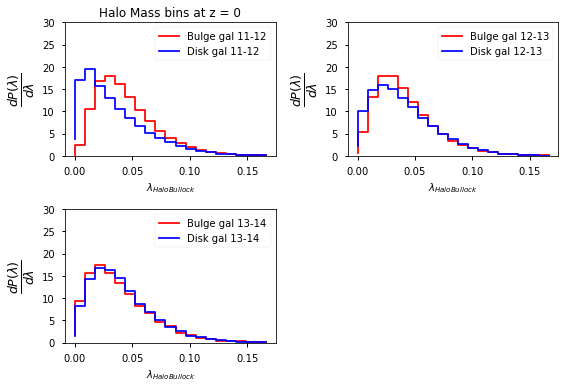

In [81]:
plt.figure(figsize=(10, 8))
fig = plt.figure(facecolor='white')

plt.subplot(221)
plt.step(bins_cen, bulgenorm_cen_Sage['lambdahist_z0_HM11_12'], color='r', label='Bulge gal 11-12')
plt.step(bins_cen, disknorm_cen_Sage['lambdahist_z0_HM11_12'], color='b', label='Disk gal 11-12')
plt.xticks([0, 0.05, 0.1, 0.15])
#plt.xlim(0, 0.15)
plt.ylim(0, 30)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
plt.title('Halo Mass bins at z = 0')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)



plt.subplot(222)
plt.step(bins_cen, bulgenorm_cen_Sage['lambdahist_z0_HM12_13'], color='r', label='Bulge gal 12-13')
plt.step(bins_cen, disknorm_cen_Sage['lambdahist_z0_HM12_13'], color='b', label='Disk gal 12-13')
plt.xticks([0, 0.05, 0.1, 0.15])
#plt.xlim(0, 0.15)
plt.ylim(0, 30)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)


plt.subplot(223)
plt.step(bins_cen, bulgenorm_cen_Sage['lambdahist_z0_HM13_14'], color='r', label='Bulge gal 13-14')
plt.step(bins_cen, disknorm_cen_Sage['lambdahist_z0_HM13_14'], color='b', label='Disk gal 13-14')
plt.xticks([0, 0.05, 0.1, 0.15])
#plt.xlim(0, 0.15)
plt.ylim(0, 30)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)


"""
plt.subplot(224)
plt.step(bins_cen, bulgenorm_cen_Sage['lambdahist_z0_HM11_12'], color='r', label='Bulge gal 11-12')
plt.step(bins_cen, disknorm_cen_Sage['lambdahist_z0_HM11_12'], color='b', label='Disk gal 11-12')
plt.xticks([0, 0.05, 0.1, 0.15])
#plt.xlim(0,0.15)
plt.ylim(0, 30)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(x)}{dx}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)
"""



plt.subplots_adjust(top=0.92, bottom=0.001, left=0.10, right=0.95, hspace=0.6,
                    wspace=0.35)
plt.style.use('seaborn-notebook')
plt.tight_layout()
#plt.savefig('morph_Centrals_HaloSpin_histonorm_SAGE_HMbin11-14_z0.png')

plt.show()

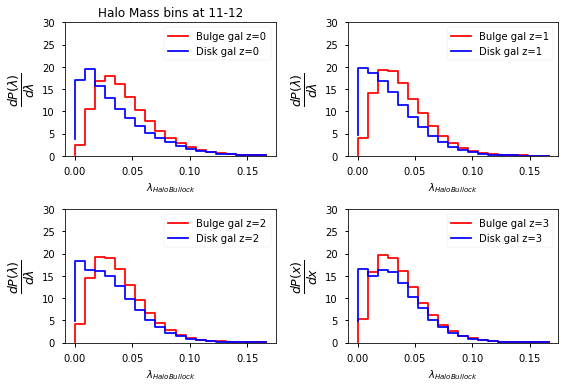

In [82]:
plt.figure(figsize=(10, 8))
fig = plt.figure(facecolor='white')

plt.subplot(221)
plt.step(bins_cen, bulgenorm_cen_Sage['lambdahist_z0_HM11_12'], color='r', label='Bulge gal z=0')
plt.step(bins_cen, disknorm_cen_Sage['lambdahist_z0_HM11_12'], color='b', label='Disk gal z=0')
plt.xticks([0, 0.05, 0.1, 0.15])
#plt.xlim(0, 0.15)
plt.ylim(0, 30)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
plt.title('Halo Mass bins at 11-12')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)



plt.subplot(222)
plt.step(bins_cen, bulgenorm_cen_Sage['lambdahist_z1_HM11_12'], color='r', label='Bulge gal z=1')
plt.step(bins_cen, disknorm_cen_Sage['lambdahist_z1_HM11_12'], color='b', label='Disk gal z=1')
plt.xticks([0, 0.05, 0.1, 0.15])
#plt.xlim(0, 0.15)
plt.ylim(0, 30)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)


plt.subplot(223)
plt.step(bins_cen, bulgenorm_cen_Sage['lambdahist_z2_HM11_12'], color='r', label='Bulge gal z=2')
plt.step(bins_cen, disknorm_cen_Sage['lambdahist_z2_HM11_12'], color='b', label='Disk gal z=2')
plt.xticks([0, 0.05, 0.1, 0.15])
#plt.xlim(0, 0.15)
plt.ylim(0, 30)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)



plt.subplot(224)
plt.step(bins_cen, bulgenorm_cen_Sage['lambdahist_z3_HM11_12'], color='r', label='Bulge gal z=3')
plt.step(bins_cen, disknorm_cen_Sage['lambdahist_z3_HM11_12'], color='b', label='Disk gal z=3')
plt.xticks([0, 0.05, 0.1, 0.15])
#plt.xlim(0,0.15)
plt.ylim(0, 30)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(x)}{dx}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)




plt.subplots_adjust(top=0.92, bottom=0.001, left=0.10, right=0.95, hspace=0.6,
                    wspace=0.35)
plt.style.use('seaborn-notebook')
plt.tight_layout()
#plt.savefig('morph_Centrals_HaloSpin_histonorm_SAGE_HMbin11-12_z0toz3.png')

plt.show()

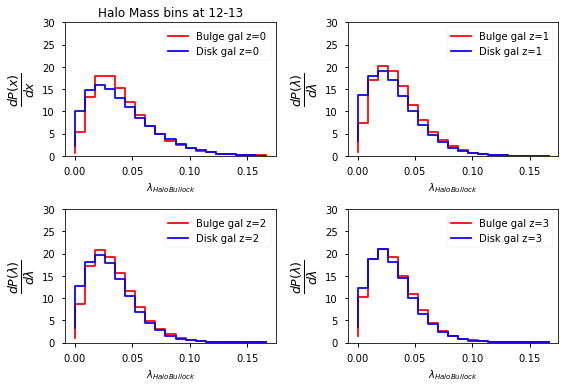

In [83]:
plt.figure(figsize=(10, 8))
fig = plt.figure(facecolor='white')

plt.subplot(221)
plt.step(bins_cen, bulgenorm_cen_Sage['lambdahist_z0_HM12_13'], color='r', label='Bulge gal z=0')
plt.step(bins_cen, disknorm_cen_Sage['lambdahist_z0_HM12_13'], color='b', label='Disk gal z=0')
plt.xticks([0, 0.05, 0.1, 0.15])
#plt.xlim(0, 0.15)
plt.ylim(0, 30)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(x)}{dx}$', fontsize=18)
plt.title('Halo Mass bins at 12-13')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)



plt.subplot(222)
plt.step(bins_cen, bulgenorm_cen_Sage['lambdahist_z1_HM12_13'], color='r', label='Bulge gal z=1')
plt.step(bins_cen, disknorm_cen_Sage['lambdahist_z1_HM12_13'], color='b', label='Disk gal z=1')
plt.xticks([0, 0.05, 0.1, 0.15])
#plt.xlim(0, 0.15)
plt.ylim(0, 30)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)


plt.subplot(223)
plt.step(bins_cen, bulgenorm_cen_Sage['lambdahist_z2_HM12_13'], color='r', label='Bulge gal z=2')
plt.step(bins_cen, disknorm_cen_Sage['lambdahist_z2_HM12_13'], color='b', label='Disk gal z=2')
plt.xticks([0, 0.05, 0.1, 0.15])
#plt.xlim(0, 0.15)
plt.ylim(0, 30)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)



plt.subplot(224)
plt.step(bins_cen, bulgenorm_cen_Sage['lambdahist_z3_HM12_13'], color='r', label='Bulge gal z=3')
plt.step(bins_cen, disknorm_cen_Sage['lambdahist_z3_HM12_13'], color='b', label='Disk gal z=3')
plt.xticks([0, 0.05, 0.1, 0.15])
#plt.xlim(0,0.15)
plt.ylim(0, 30)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)




plt.subplots_adjust(top=0.92, bottom=0.001, left=0.10, right=0.95, hspace=0.6,
                    wspace=0.35)
plt.style.use('seaborn-notebook')
plt.tight_layout()
plt.savefig('morph_Centrals_HaloSpin_histonorm_SAGE_HMbin12-13_z0toz3.png')

plt.show()